In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import tensorkrowch as tk

In [2]:
torch.set_num_threads(1)
cwd = os.getcwd()
cwd = os.path.join(cwd, '..', '..')

## Random MPS and Slater

In [3]:
n_features_list = [100, 200, 500]
phys_dim = 2
bond_dim1 = 10
bond_dim2 = None
samples_size = 1000
sketch_size_list = [10, 12, 14, 16, 18, 20]

results_dir = os.path.join(cwd, 'results', '1_performance', 'random_mps')

errors_random_mps = {}
sketch_random_mps = {}
times_random_mps = {}

for n_features in n_features_list:
    for sketch_size in sketch_size_list:
        bond_dim2 = sketch_size
        aux_dir = f'rss_{n_features}_{phys_dim}_{bond_dim1}_{bond_dim2}_{samples_size}_{sketch_size}'
        files = os.listdir(os.path.join(results_dir, aux_dir))
        
        aux_errors = torch.Tensor([float(f.split('_')[2]) for f in files])
        aux_sketch = torch.Tensor([float(f.split('_')[1]) for f in files])
        aux_times = torch.Tensor([float(f.split('_')[0]) for f in files])
        
        # Remove outliers
        # aux_errors, ids = aux_errors.sort()
        # aux_times = aux_times[ids]
        
        q = torch.Tensor([0.25, 0.75])
        quantiles = aux_errors.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_errors >= (quantiles[0] - 1.5 * iqr)) * (aux_errors <= (quantiles[1] + 1.5 * iqr))
        aux_errors = aux_errors[cond]
        
        quantiles = aux_sketch.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_sketch >= (quantiles[0] - 1.5 * iqr)) * (aux_sketch <= (quantiles[1] + 1.5 * iqr))
        aux_sketch = aux_sketch[cond]
        
        quantiles = aux_times.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_times >= (quantiles[0] - 1.5 * iqr)) * (aux_times <= (quantiles[1] + 1.5 * iqr))
        aux_times = aux_times[cond]
        
        if n_features not in errors_random_mps:
            errors_random_mps[n_features] = [(aux_errors.mean(), aux_errors.std())]
            sketch_random_mps[n_features] = [(aux_sketch.mean(), aux_sketch.std())]
            times_random_mps[n_features] = [(aux_times.mean(), aux_times.std())]
        else:
            errors_random_mps[n_features].append((aux_errors.mean(), aux_errors.std()))
            sketch_random_mps[n_features].append((aux_sketch.mean(), aux_sketch.std()))
            times_random_mps[n_features].append((aux_times.mean(), aux_times.std()))

errors_random_mps

{100: [(tensor(1.1998), tensor(0.4258)),
  (tensor(0.8992), tensor(0.0812)),
  (tensor(0.6407), tensor(0.1599)),
  (tensor(0.3763), tensor(0.3034)),
  (tensor(0.4338), tensor(0.1413)),
  (tensor(0.1958), tensor(0.1856))],
 200: [(tensor(1.1650), tensor(0.2456)),
  (tensor(0.7381), tensor(0.1079)),
  (tensor(0.4875), tensor(0.3308)),
  (tensor(0.5177), tensor(0.1245)),
  (tensor(0.3605), tensor(0.0784)),
  (tensor(0.3771), tensor(0.1011))],
 500: [(tensor(1.5058), tensor(0.6547)),
  (tensor(0.7501), tensor(0.1339)),
  (tensor(0.4239), tensor(0.1544)),
  (tensor(0.4906), tensor(0.1417)),
  (tensor(0.3198), tensor(0.1963)),
  (tensor(0.1723), tensor(0.2155))]}

In [4]:
L = 10.
m = 5
d_list = [20, 40, 100]
phys_dim = 2
bond_dim = 10
samples_size = 1000
sketch_size_list = [30, 40, 50, 60, 70, 80, 90, 100]

results_dir = os.path.join(cwd, 'results', '1_performance', 'slater_functions')

errors_slater = {}
sketch_slater = {}
times_slater = {}

for d in d_list:
    n_features = m*d
    for sketch_size in sketch_size_list:
        aux_dir = f'rss_{L}_{m}_{d}_{bond_dim}_{samples_size}_{sketch_size}'
        files = os.listdir(os.path.join(results_dir, aux_dir))
        
        aux_errors = torch.Tensor([float(f.split('_')[-1][:-3]) for f in files])
        aux_sketch = torch.Tensor([float(f.split('_')[1]) for f in files])
        aux_times = torch.Tensor([float(f.split('_')[0]) for f in files])
        
        # Remove outliers
        # aux_errors, ids = aux_errors.sort()
        # aux_times = aux_times[ids]
        
        q = torch.Tensor([0.25, 0.75])
        quantiles = aux_errors.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_errors >= (quantiles[0] - 1.5 * iqr)) * (aux_errors <= (quantiles[1] + 1.5 * iqr))
        aux_errors = aux_errors[cond]
        
        quantiles = aux_sketch.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_sketch >= (quantiles[0] - 1.5 * iqr)) * (aux_sketch <= (quantiles[1] + 1.5 * iqr))
        aux_sketch = aux_sketch[cond]
        
        quantiles = aux_times.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_times >= (quantiles[0] - 1.5 * iqr)) * (aux_times <= (quantiles[1] + 1.5 * iqr))
        aux_times = aux_times[cond]
        
        if n_features not in errors_slater:
            errors_slater[n_features] = [(aux_errors.mean(), aux_errors.std())]
            sketch_slater[n_features] = [(aux_sketch.mean(), aux_sketch.std())]
            times_slater[n_features] = [(aux_times.mean(), aux_times.std())]
        else:
            errors_slater[n_features].append((aux_errors.mean(), aux_errors.std()))
            sketch_slater[n_features].append((aux_sketch.mean(), aux_sketch.std()))
            times_slater[n_features].append((aux_times.mean(), aux_times.std()))

errors_slater

{100: [(tensor(3.2886), tensor(3.1213)),
  (tensor(0.8086), tensor(0.6074)),
  (tensor(1.8046), tensor(1.5500)),
  (tensor(0.4925), tensor(0.3521)),
  (tensor(0.5639), tensor(0.5626)),
  (tensor(0.4129), tensor(0.3161)),
  (tensor(0.3075), tensor(0.2416)),
  (tensor(0.9610), tensor(0.5694))],
 200: [(tensor(2.4591), tensor(1.4851)),
  (tensor(1.5943), tensor(1.5633)),
  (tensor(1.0629), tensor(0.6670)),
  (tensor(0.5352), tensor(0.2713)),
  (tensor(0.7403), tensor(0.6116)),
  (tensor(0.2453), tensor(0.1594)),
  (tensor(0.3465), tensor(0.2403)),
  (tensor(0.2607), tensor(0.1771))],
 500: [(tensor(1.3867), tensor(1.2063)),
  (tensor(0.5631), tensor(0.2942)),
  (tensor(0.5412), tensor(0.4150)),
  (tensor(0.9251), tensor(1.0368)),
  (tensor(1.5157), tensor(1.7825)),
  (tensor(0.6515), tensor(0.5285)),
  (tensor(0.3372), tensor(0.1640)),
  (tensor(0.6652), tensor(0.5755))]}

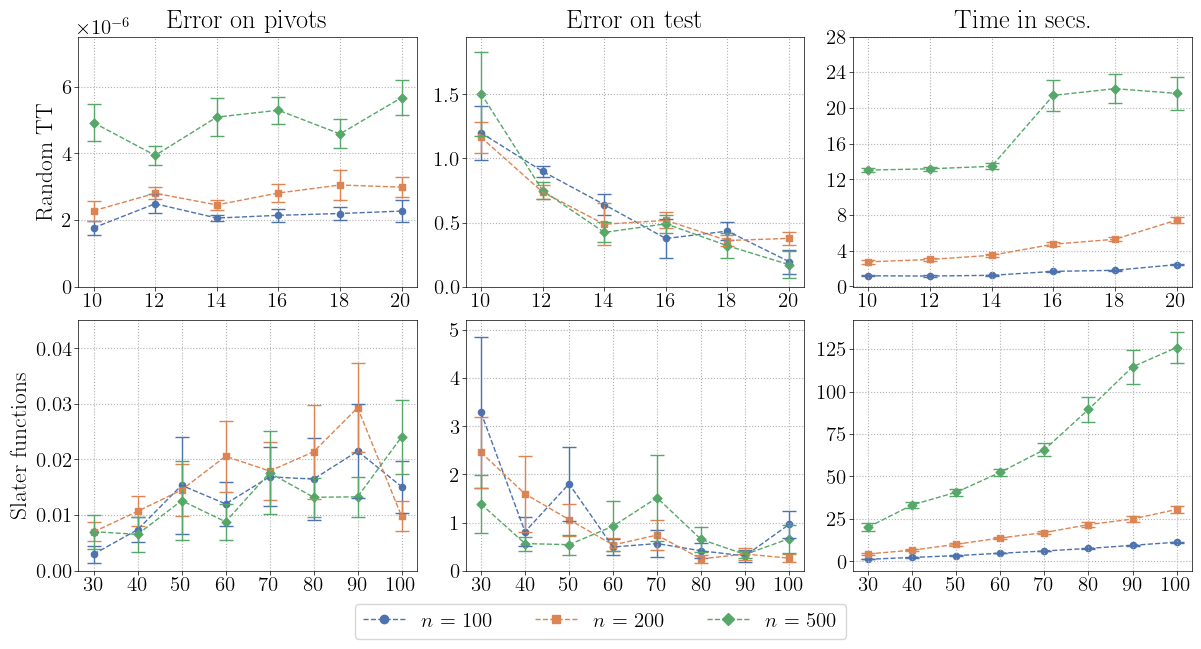

In [5]:
palette = sns.color_palette("deep")
colors = palette[0], palette[1], palette[2]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15


markers = ['o', 's', 'D']
labels = [r'$n$ = 100', r'$n$ = 200', r'$n$ = 500']

fig, axs = plt.subplots(2, 3, figsize=(12, 6))


# Random MPS
# ----------
sketch_size_list = [10, 12, 14, 16, 18, 20]

# Sketch
for i, n_features in enumerate([100, 200, 500]):
    means = torch.stack(list(map(lambda t: t[0],
                                 sketch_random_mps[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                sketch_random_mps[n_features]))).tolist()

    axs[0, 0].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 0].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 0].set_ylabel('Random TT')
axs[0, 0].set_title('Error on pivots')

axs[0, 0].set_ylim(0, 0.75 * 1e-5)
axs[0, 0].yaxis.grid(linestyle=':')
axs[0, 0].xaxis.grid(linestyle=':')

axs[0, 0].set_xticks(torch.arange(10, 22, 2))


# Errors
for i, n_features in enumerate([100, 200, 500]):
    means = torch.stack(list(map(lambda t: t[0],
                                 errors_random_mps[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                errors_random_mps[n_features]))).tolist()

    axs[0, 1].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 1].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 1].set_title('Error on test')

axs[0, 1].set_ylim(0, 1.95)
axs[0, 1].yaxis.grid(linestyle=':')
axs[0, 1].xaxis.grid(linestyle=':')

axs[0, 1].set_xticks(torch.arange(10, 22, 2))


# Times
for i, n_features in enumerate([100, 200, 500]):
    means = torch.stack(list(map(lambda t: t[0],
                                 times_random_mps[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                times_random_mps[n_features]))).tolist()

    axs[0, 2].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 2].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 2].set_title('Time in secs.')

axs[0, 2].yaxis.grid(linestyle=':')
axs[0, 2].xaxis.grid(linestyle=':')

axs[0, 2].set_xticks(torch.arange(10, 22, 2))
axs[0, 2].set_yticks(torch.arange(0, 32, 4))


# Slater
# ------
sketch_size_list = [30, 40, 50, 60, 70, 80, 90, 100]

# Sketch
for i, n_features in enumerate([100, 200, 500]):
    means = torch.stack(list(map(lambda t: t[0],
                                 sketch_slater[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                sketch_slater[n_features]))).tolist()

    axs[1, 0].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 0].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 0].set_ylabel('Slater functions')

axs[1, 0].set_ylim(0, 0.045)
axs[1, 0].yaxis.grid(linestyle=':')
axs[1, 0].xaxis.grid(linestyle=':')

axs[1, 0].set_xticks(torch.arange(30, 110, 10))

# Errors
for i, n_features in enumerate([100, 200, 500]):
    means = torch.stack(list(map(lambda t: t[0],
                                 errors_slater[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                errors_slater[n_features]))).tolist()

    axs[1, 1].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 1].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 1].set_ylim(0, 5.2)
axs[1, 1].yaxis.grid(linestyle=':')
axs[1, 1].xaxis.grid(linestyle=':')

axs[1, 1].set_xticks(torch.arange(30, 110, 10))
axs[1, 1].set_yticks(torch.arange(0, 6, 1))


# Times
for i, n_features in enumerate([100, 200, 500]):
    means = torch.stack(list(map(lambda t: t[0],
                                 times_slater[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                times_slater[n_features]))).tolist()

    axs[1, 2].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 2].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 2].yaxis.grid(linestyle=':')
axs[1, 2].xaxis.grid(linestyle=':')

axs[1, 2].set_xticks(torch.arange(30, 110, 10))
axs[1, 2].set_yticks(torch.arange(0, 140, 25))


# Create custom legend handles
from matplotlib.lines import Line2D

custom_handles = [
    Line2D([0], [0], color=color, linestyle='--', marker=marker, markersize=6, linewidth=1., label=label)
    for color, marker, label in zip(colors, markers, labels)
]

# Add a single legend to the figure
fig.legend(
    handles=custom_handles,
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, -0.075),  # Centered below the plots
    # frameon=False
)


plt.tight_layout(pad=0.25)


for i in range(2):
    for j in range(3):
        axs[i, j].tick_params(axis='both', which='major', pad=1,
                              direction='out', length=3, width=0.5)  # Default is usually around 6-10
        axs[i, j].tick_params(axis='both', which='minor', pad=1,
                              direction='out', length=3, width=0.5)

results_dir = os.path.join(cwd, 'results', '1_performance')
plt.savefig(os.path.join(results_dir, 'performance_slater_random.pdf'),
            bbox_inches='tight')

plt.show()

## Bars Stripes and MNIST

In [6]:
n_features_list = [12, 16, 20]
phys_dim = 2
bond_dim = 10
samples_size = 1000
sketch_size_list = [30, 40, 50, 60, 70, 80, 90, 100]

results_dir = os.path.join(cwd, 'results', '1_performance', 'bars_stripes')

errors_bars_stripes = {}
sketch_bars_stripes = {}
accs_bars_stripes = {}
times_bars_stripes = {}

for n_features in n_features_list:
    for sketch_size in sketch_size_list:
        aux_dir = f'rss_{n_features}_{phys_dim}_{bond_dim}_{samples_size}_{sketch_size}'
        files = os.listdir(os.path.join(results_dir, aux_dir))
        
        aux_errors = torch.Tensor([float(f.split('_')[2]) for f in files])
        aux_sketch = torch.Tensor([float(f.split('_')[1]) for f in files])
        aux_accs = torch.Tensor([float(f.split('_')[3][:-3]) for f in files])
        aux_times = torch.Tensor([float(f.split('_')[0]) for f in files])
        
        # Remove outliers
        # aux_errors, ids = aux_errors.sort()
        # aux_times = aux_times[ids]
        
        q = torch.Tensor([0.25, 0.75])
        quantiles = aux_errors.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_errors >= (quantiles[0] - 1.5 * iqr)) * (aux_errors <= (quantiles[1] + 1.5 * iqr))
        aux_errors = aux_errors[cond]
        
        quantiles = aux_sketch.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_sketch >= (quantiles[0] - 1.5 * iqr)) * (aux_sketch <= (quantiles[1] + 1.5 * iqr))
        aux_sketch = aux_sketch[cond]
        
        quantiles = aux_accs.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_accs >= (quantiles[0] - 1.5 * iqr)) * (aux_accs <= (quantiles[1] + 1.5 * iqr))
        aux_accs = aux_accs[cond]
        
        quantiles = aux_times.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_times >= (quantiles[0] - 1.5 * iqr)) * (aux_times <= (quantiles[1] + 1.5 * iqr))
        aux_times = aux_times[cond]
        
        if n_features not in errors_bars_stripes:
            errors_bars_stripes[n_features] = [(aux_errors.mean(), aux_errors.std())]
            sketch_bars_stripes[n_features] = [(aux_sketch.mean(), aux_sketch.std())]
            accs_bars_stripes[n_features] = [(aux_accs.mean(), aux_accs.std())]
            times_bars_stripes[n_features] = [(aux_times.mean(), aux_times.std())]
        else:
            errors_bars_stripes[n_features].append((aux_errors.mean(), aux_errors.std()))
            sketch_bars_stripes[n_features].append((aux_sketch.mean(), aux_sketch.std()))
            accs_bars_stripes[n_features].append((aux_accs.mean(), aux_accs.std()))
            times_bars_stripes[n_features].append((aux_times.mean(), aux_times.std()))

accs_bars_stripes

{12: [(tensor(0.0110), tensor(0.)),
  (tensor(0.0100), tensor(9.8170e-10)),
  (tensor(0.0090), tensor(9.8170e-10)),
  (tensor(0.0100), tensor(9.8170e-10)),
  (tensor(0.0096), tensor(0.0005)),
  (tensor(0.0140), tensor(0.)),
  (tensor(0.0070), tensor(0.)),
  (tensor(0.0050), tensor(4.9085e-10))],
 16: [(tensor(0.0410), tensor(3.9825e-09)),
  (tensor(0.0288), tensor(0.0010)),
  (tensor(0.0121), tensor(0.0006)),
  (tensor(0.0260), tensor(4.0238e-09)),
  (tensor(0.0504), tensor(0.0010)),
  (tensor(0.0408), tensor(0.0023)),
  (tensor(0.0446), tensor(0.0008)),
  (tensor(0.0489), tensor(0.0025))],
 20: [(tensor(0.3846), tensor(0.0018)),
  (tensor(0.1379), tensor(0.0031)),
  (tensor(0.1384), tensor(0.0035)),
  (tensor(0.1056), tensor(0.0015)),
  (tensor(0.0902), tensor(0.0033)),
  (tensor(0.0876), tensor(0.0014)),
  (tensor(0.0951), tensor(0.0023)),
  (tensor(0.1506), tensor(0.0063))]}

In [7]:
n_features_list = [12, 16, 20]
phys_dim = 2
bond_dim = 10
samples_size = 1000
sketch_size_list = [30, 40, 50, 60, 70, 80, 90, 100]

results_dir = os.path.join(cwd, 'results', '1_performance', 'mnist')

errors_mnist = {}
sketch_mnist = {}
accs_mnist = {}
times_mnist = {}

for n_features in n_features_list:
    for sketch_size in sketch_size_list:
        aux_dir = f'rss_{n_features}_{phys_dim}_{bond_dim}_{samples_size}_{sketch_size}'
        files = os.listdir(os.path.join(results_dir, aux_dir))
        
        aux_errors = torch.Tensor([float(f.split('_')[2]) for f in files])
        aux_sketch = torch.Tensor([float(f.split('_')[1]) for f in files])
        aux_accs = torch.Tensor([float(f.split('_')[3][:-3]) for f in files])
        aux_times = torch.Tensor([float(f.split('_')[0]) for f in files])
        
        # Remove outliers
        # aux_errors, ids = aux_errors.sort()
        # aux_times = aux_times[ids]
        
        q = torch.Tensor([0.25, 0.75])
        quantiles = aux_errors.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_errors >= (quantiles[0] - 1.5 * iqr)) * (aux_errors <= (quantiles[1] + 1.5 * iqr))
        aux_errors = aux_errors[cond]
        
        quantiles = aux_sketch.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_sketch >= (quantiles[0] - 1.5 * iqr)) * (aux_sketch <= (quantiles[1] + 1.5 * iqr))
        aux_sketch = aux_sketch[cond]
        
        quantiles = aux_accs.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_accs >= (quantiles[0] - 1.5 * iqr)) * (aux_accs <= (quantiles[1] + 1.5 * iqr))
        aux_accs = aux_accs[cond]
        
        quantiles = aux_times.quantile(q=q)
        iqr = quantiles[1] - quantiles[0]
        cond = (aux_times >= (quantiles[0] - 1.5 * iqr)) * (aux_times <= (quantiles[1] + 1.5 * iqr))
        aux_times = aux_times[cond]
        
        if n_features not in errors_mnist:
            errors_mnist[n_features] = [(aux_errors.mean(), aux_errors.std())]
            sketch_mnist[n_features] = [(aux_sketch.mean(), aux_sketch.std())]
            accs_mnist[n_features] = [(aux_accs.mean(), aux_accs.std())]
            times_mnist[n_features] = [(aux_times.mean(), aux_times.std())]
        else:
            errors_mnist[n_features].append((aux_errors.mean(), aux_errors.std()))
            sketch_mnist[n_features].append((aux_sketch.mean(), aux_sketch.std()))
            accs_mnist[n_features].append((aux_accs.mean(), aux_accs.std()))
            times_mnist[n_features].append((aux_times.mean(), aux_times.std()))

accs_mnist

{12: [(tensor(0.4300), tensor(0.0042)),
  (tensor(0.3831), tensor(0.0025)),
  (tensor(0.3091), tensor(0.0016)),
  (tensor(0.2527), tensor(0.0023)),
  (tensor(0.2661), tensor(0.0101)),
  (tensor(0.2271), tensor(0.0111)),
  (tensor(0.2123), tensor(0.0078)),
  (tensor(0.2103), tensor(0.0082))],
 16: [(tensor(0.4447), tensor(0.0005)),
  (tensor(0.3780), tensor(0.0223)),
  (tensor(0.3027), tensor(0.0005)),
  (tensor(0.2993), tensor(0.0119)),
  (tensor(0.2840), tensor(0.0125)),
  (tensor(0.2900), tensor(0.0009)),
  (tensor(0.2499), tensor(0.0085)),
  (tensor(0.2468), tensor(0.0065))],
 20: [(tensor(0.5059), tensor(0.0073)),
  (tensor(0.4045), tensor(0.0097)),
  (tensor(0.3322), tensor(0.0091)),
  (tensor(0.3401), tensor(0.0220)),
  (tensor(0.3116), tensor(0.0181)),
  (tensor(0.2730), tensor(0.0076)),
  (tensor(0.2530), tensor(0.0152)),
  (tensor(0.2411), tensor(0.0039))]}

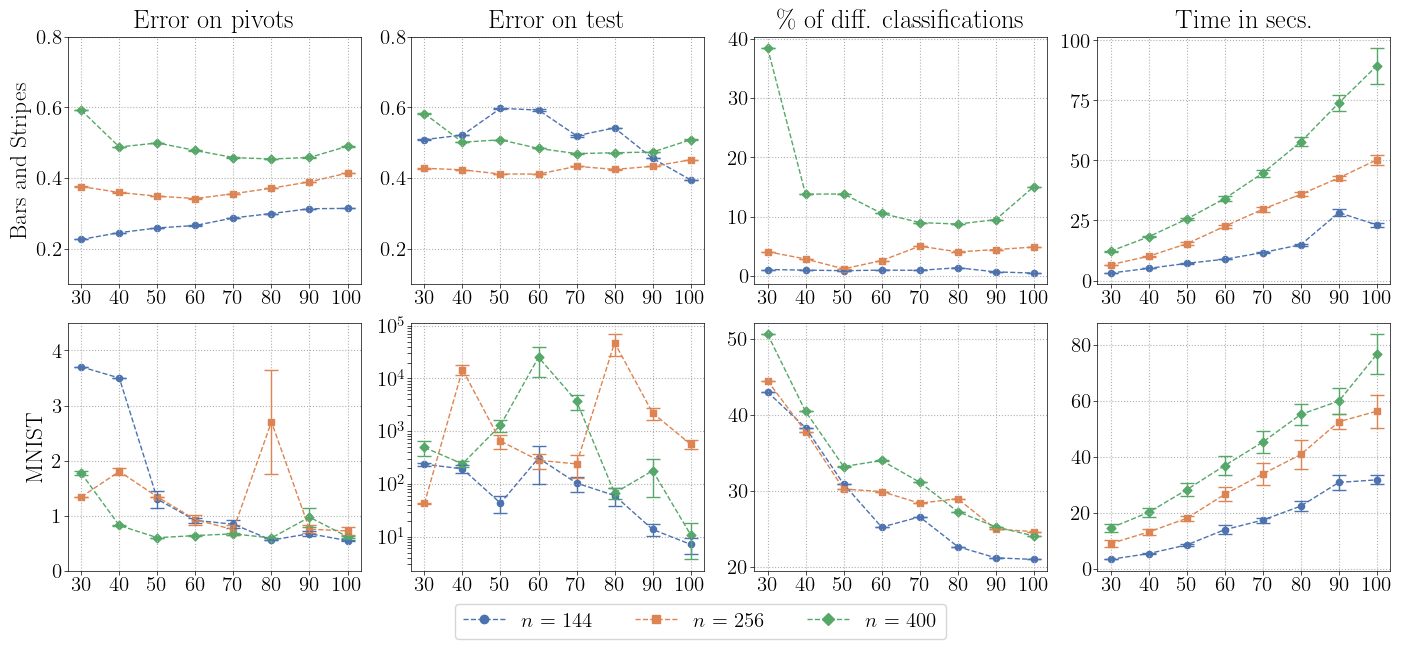

In [8]:
palette = sns.color_palette("deep")
colors = palette[0], palette[1], palette[2]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15


markers = ['o', 's', 'D']
labels = [r'$n$ = 144', r'$n$ = 256', r'$n$ = 400']

fig, axs = plt.subplots(2, 4, figsize=(14, 6))


# Bars Stripes
# ------------
sketch_size_list = [30, 40, 50, 60, 70, 80, 90, 100]

# Sketch
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0],
                                 sketch_bars_stripes[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                sketch_bars_stripes[n_features]))).tolist()

    axs[0, 0].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 0].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 0].set_ylabel('Bars and Stripes')
axs[0, 0].set_title('Error on pivots')

axs[0, 0].set_ylim(0.1, 0.8)
axs[0, 0].yaxis.grid(linestyle=':')
axs[0, 0].xaxis.grid(linestyle=':')

axs[0, 0].set_xticks(torch.arange(30, 110, 10))


# Errors
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0],
                                 errors_bars_stripes[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                errors_bars_stripes[n_features]))).tolist()

    axs[0, 1].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 1].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 1].set_title('Error on test')

axs[0, 1].set_ylim(0.1, 0.8)
axs[0, 1].yaxis.grid(linestyle=':')
axs[0, 1].xaxis.grid(linestyle=':')

axs[0, 1].set_xticks(torch.arange(30, 110, 10))

# Accuracies
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 accs_bars_stripes[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                accs_bars_stripes[n_features]))).tolist()

    axs[0, 2].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 2].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 2].set_title('\% of diff. classifications')

# axs[0].set_ylim(-30, 40)
axs[0, 2].yaxis.grid(linestyle=':')
axs[0, 2].xaxis.grid(linestyle=':')

axs[0, 2].set_xticks(torch.arange(30, 110, 10))

# Times
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0],
                                 times_bars_stripes[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                times_bars_stripes[n_features]))).tolist()

    axs[0, 3].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[0, 3].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[0, 3].set_title('Time in secs.')

axs[0, 3].yaxis.grid(linestyle=':')
axs[0, 3].xaxis.grid(linestyle=':')

axs[0, 3].set_xticks(torch.arange(30, 110, 10))


# MNIST
# -----
sketch_size_list = [30, 40, 50, 60, 70, 80, 90, 100]

# Sketch
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0],
                                 sketch_mnist[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                sketch_mnist[n_features]))).tolist()

    axs[1, 0].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 0].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 0].set_ylabel('MNIST')

axs[1, 0].set_ylim(0, 4.5)
axs[1, 0].yaxis.grid(linestyle=':')
axs[1, 0].xaxis.grid(linestyle=':')

axs[1, 0].set_xticks(torch.arange(30, 110, 10))

# Errors
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0],
                                 errors_mnist[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                errors_mnist[n_features]))).tolist()

    axs[1, 1].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 1].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 1].yaxis.grid(linestyle=':')
axs[1, 1].xaxis.grid(linestyle=':')

axs[1, 1].set_yscale('log')

axs[1, 1].set_xticks(torch.arange(30, 110, 10))

# Accuracies
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 accs_mnist[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                accs_mnist[n_features]))).tolist()

    axs[1, 2].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 2].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 2].yaxis.grid(linestyle=':')
axs[1, 2].xaxis.grid(linestyle=':')

axs[1, 2].set_xticks(torch.arange(30, 110, 10))

# Times
for i, n_features in enumerate([12, 16, 20]):
    means = torch.stack(list(map(lambda t: t[0],
                                 times_mnist[n_features]))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 0.5,
                                times_mnist[n_features]))).tolist()

    axs[1, 3].errorbar(x=sketch_size_list, y=means, yerr=stds, capsize=5.,
                       linestyle='--', linewidth=1., color=colors[i])
    axs[1, 3].scatter(x=sketch_size_list, y=means, s=20.,
                      color=colors[i], marker=markers[i], label=labels[i])

# Set axes
axs[1, 3].yaxis.grid(linestyle=':')
axs[1, 3].xaxis.grid(linestyle=':')

axs[1, 3].set_xticks(torch.arange(30, 110, 10))


# Create custom legend handles
from matplotlib.lines import Line2D

custom_handles = [
    Line2D([0], [0], color=color, linestyle='--', marker=marker, markersize=6, linewidth=1., label=label)
    for color, marker, label in zip(colors, markers, labels)
]

# Add a single legend to the figure
fig.legend(
    handles=custom_handles,
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, -0.075),  # Centered below the plots
    # frameon=False
)


plt.tight_layout(pad=0.25)


for i in range(2):
    for j in range(4):
        axs[i, j].tick_params(axis='both', which='major', pad=1,
                              direction='out', length=3, width=0.5)  # Default is usually around 6-10
        axs[i, j].tick_params(axis='both', which='minor', pad=1,
                              direction='out', length=3, width=0.5)
        

results_dir = os.path.join(cwd, 'results', '1_performance')
plt.savefig(os.path.join(results_dir, 'performance_bars_stripes_mnist.pdf'),
            bbox_inches='tight')

plt.show()